### 01 서울시 구별 CCTV 현황 분석
**[학습목표]**
1. 서울시 구별 CCTV 데이터 파악, 인구대비 파악
2. 인구대비 평균치 파악, 구별 과부족 파악
3. pandas 사용법, 시각화(matplotlib)
4. 단순한 그래프로 시각화 

In [81]:
# Pandas : 데이터 처리 기능
# 데이터 타입(데이터 저장 방식) 2개 있다
# 1. Series class : 컬럼을 다룬다, 1차원 데이터 => new => object(속성, 메소드)
# 2. DataFrame class(속성, 메소드) : 행렬(행X열) 을 다룬다, 2차원 데이터, Series가 모여서 DataFrame  
import numpy as np
import pandas as pd # 별칭


In [82]:
# pandas 데이터 파일 읽기 : csv 파일
# pd.read_csv(파일, encoding='utf-8') => return DataFrame
CCTV_Seoul = pd.read_csv('./data/01. CCTV_in_Seoul.csv', encoding='utf-8')
# CCTV_Seoul : DataFrame object .head() : 메소드 => 앞에서 5개 ROW 표시
# CCTV_Seoul.head()
CCTV_Seoul.tail() # 뒤에서 5개 표시


,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,1624,1368,218,112,398
21,은평구,1873,1138,224,278,468
22,종로구,1002,464,314,211,630
23,중구,671,413,190,72,348
24,중랑구,660,509,121,177,109


In [83]:
# DataFrame 기본 구조
# CCTV_Seoul.index  : 행 정보
# CCTV_Seoul.columns : 컬럼 정보
# CCTV_Seoul.values : 데이터
# 컬럼 추출
print(CCTV_Seoul.columns)
# 첫번째 컬럼명 추출
print(CCTV_Seoul.columns[0])
# 마지막 컬럼명 추출
print(CCTV_Seoul.columns[-1])

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')
기관명
2016년


In [84]:
# 데이터 구조 파악
CCTV_Seoul.describe() # 수치 데이터에 대한 통계량

,소계,2013년도 이전,2014년,2015년,2016년
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1179.080000,764.760000,159.480000,205.200000,385.880000
std,556.728983,415.510257,104.132976,137.877059,182.479981
min,485.000000,238.000000,21.000000,30.000000,81.000000
25%,748.000000,464.000000,78.000000,103.000000,292.000000
50%,1015.000000,573.000000,142.000000,184.000000,377.000000
75%,1496.000000,1070.000000,218.000000,269.000000,467.000000
max,2780.000000,1843.000000,430.000000,584.000000,932.000000


In [85]:
# 데이터 전체 구조 파악 
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [86]:
# 컬럼명 변경 : rename() 메소드
# 기관명 -> 구별
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'}) # Dict


,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [87]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [88]:
# 컬럼명 변경 방법
# 1. 변경후 대입
# CCTV_Seoul_구별 = CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'})
# 2. inplace=True : 원본에 반영
# CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'}, inplace=True) # inplace=True 원본에 반영
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'}, inplace=True)

In [89]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [90]:
## 인구현황 데이터 읽기 
# xls => xrld, xlsx =>openyxl
POP_Seoul = \
pd.read_excel('./data/01. population_in_Seoul.xls'
              , header=2
              , usecols='B,D,G,J,N'
              )

In [91]:
POP_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [92]:
# 데이터 처리
# 1. 컬럼명 변경
# 구별, 인구수, 한국인, 외국인, 고령자
POP_Seoul.rename(columns={
    POP_Seoul.columns[0]:'구별'
    , POP_Seoul.columns[1]:'인구수'
    , POP_Seoul.columns[2]:'한국인'
    , POP_Seoul.columns[3]:'외국인'
    , POP_Seoul.columns[4]:'고령자'
}
, inplace=True
)
# 컬럼명 확인
print(POP_Seoul.columns)

Index(['구별', '인구수', '한국인', '외국인', '고령자'], dtype='object')


In [93]:
POP_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### Pandas 기초
##### 컬럼 생성 : Series 다루기

In [94]:
# numpy array와 list 차이
# 목적 : 여러개 저장, 묶는다
# 1. array : 동일 타입만 저장 => 연속된 공간 저장된다. => 고속 처리 가능
# 데이터 타입이 많이 분리가 된다. => int32, int64, int128, float16, fload32,,,,
# 2. list : 아무거나 다 저장 => 비연속 공간에 저장가능

In [95]:
# Series 생성
# 속성
# 1. index : 인덱스 관리
# 1.1 named index : 이름으로 지정된 인덱스
# 1.2 integer index : 숫자로 된 인덱스
# 2. values : 값 , array
# 3. name : 이름 => 컬럼명
# 4. dtype : 데이터 타입 저장

# s = pd.Series(iterable) # list, tuple, str, ndarray(다차원배열)
data = [1,2,3,4,5] # list
series = pd.Series(data)
print(series)

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [96]:
# named index 처리
data = [1,2,3,4,5]
index = ['a','b','c','d','e']
series = pd.Series(data=data, index=index)
print(series)

a    1
b    2
c    3
d    4
e    5
dtype: int64


In [97]:
data_index = { # dict
      'a': 1
    , 'b' : 2
    , 'c' : 3
    , 'd' : 4
    , 'e' : 5
}
series = pd.Series(data_index)
print(series)

a    1
b    2
c    3
d    4
e    5
dtype: int64


In [98]:
# 스칼라 값과 인덱스 리스트로 시리즈 생성
data = 5
index = ['a','b','c']
series = pd.Series(data=data, index=index)
print(series)

a    5
b    5
c    5
dtype: int64


In [99]:
series = pd.Series(data=[1,2,3]
                   , index=['a','b','c']
                   , name='sample_series'
                   , dtype='int8')
print(series)
print(series.values)
print(series.index)
print(series.name)
print(series.dtype)

a    1
b    2
c    3
Name: sample_series, dtype: int8
[1 2 3]
Index(['a', 'b', 'c'], dtype='object')
sample_series
int8


In [100]:
# 연산 및 슬라이싱
# 연산 : 배열(numpy-array) 연산 동일
series = pd.Series(data=[1,2,3], index=['a','b','c'])
print(series)
print(series + 1) # 브로드 캐스팅(for 필요없어진다.), 요소별 연산
print(series * 2)

a    1
b    2
c    3
dtype: int64
a    2
b    3
c    4
dtype: int64
a    2
b    4
c    6
dtype: int64


In [101]:
# 인덱싱, 슬라이싱
series = pd.Series(data=[1,2,3], index=['a','b','c'])
print(series)
print(series['b']) # 인덱싱 : 단일값 추출
# 2,3 추출
print(series['b':'c']) # named index로 슬라이싱 처리
print(series[1:]) # 숫자 인덱스를 사용한 슬라이싱 처리

a    1
b    2
c    3
dtype: int64
2
b    2
c    3
dtype: int64
b    2
c    3
dtype: int64


In [102]:
# 시리즈 함수 적용
# apply(function)
series = pd.Series(data=[1,2,3,4,5], index=['a','b','c','d','e'])
print(series)
print(series.apply(lambda x:x**2))


a    1
b    2
c    3
d    4
e    5
dtype: int64
a     1
b     4
c     9
d    16
e    25
dtype: int64


In [103]:
# map 메소드 
print(series)
print(series.map({
      1:'one'
    , 2:'two'
    , 3:'three'
}))

a    1
b    2
c    3
d    4
e    5
dtype: int64
a      one
b      two
c    three
d      NaN
e      NaN
dtype: object


In [104]:
series = pd.Series([1,2,2,3,4])
print(series)
print('합 : ',series.sum())
print('누적합 : ',series.cumsum())
print('값의 빈도 : ', series.value_counts())
print('평균 : ',series.mean())
print('중앙값 : ',series.median())
print('표준편차 : ',series.std())

0    1
1    2
2    2
3    3
4    4
dtype: int64
합 :  12
누적합 :  0     1
1     3
2     5
3     8
4    12
dtype: int64
값의 빈도 :  2    2
1    1
3    1
4    1
Name: count, dtype: int64
평균 :  2.4
중앙값 :  2.0
표준편차 :  1.140175425099138


In [105]:
# date_range() function
# 일정 기간 동안의 날짜 범위를 생성하는데 사용, 주로 시계열 데이터 처리에 사용
# date_range(start, end, periods, freq, tz,,,,)
dates = pd.date_range('20240628', periods=7)
print(dates)

DatetimeIndex(['2024-06-28', '2024-06-29', '2024-06-30', '2024-07-01',
               '2024-07-02', '2024-07-03', '2024-07-04'],
              dtype='datetime64[ns]', freq='D')


In [106]:
series = pd.Series(data=[1,2,3,4,5,6,7], index=dates)
print(series)
print(series['2024-07-01':'2024-07-03']) # 날짜로 슬라이싱

2024-06-28    1
2024-06-29    2
2024-06-30    3
2024-07-01    4
2024-07-02    5
2024-07-03    6
2024-07-04    7
Freq: D, dtype: int64
2024-07-01    4
2024-07-02    5
2024-07-03    6
Freq: D, dtype: int64


In [107]:
# date_range(start, end, periods, freq, tz,,,,)
date_range = pd.date_range(start='2024-06-28', periods=10) # Day 
print(date_range)

DatetimeIndex(['2024-06-28', '2024-06-29', '2024-06-30', '2024-07-01',
               '2024-07-02', '2024-07-03', '2024-07-04', '2024-07-05',
               '2024-07-06', '2024-07-07'],
              dtype='datetime64[ns]', freq='D')


In [108]:
date_range = pd.date_range(start='2024-06-28', end='2024-10-11')
print(date_range)

DatetimeIndex(['2024-06-28', '2024-06-29', '2024-06-30', '2024-07-01',
               '2024-07-02', '2024-07-03', '2024-07-04', '2024-07-05',
               '2024-07-06', '2024-07-07',
               ...
               '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-05',
               '2024-10-06', '2024-10-07', '2024-10-08', '2024-10-09',
               '2024-10-10', '2024-10-11'],
              dtype='datetime64[ns]', length=106, freq='D')


In [109]:
date_range = pd.date_range(start='20240628', periods=10, freq='H')
print(date_range)

DatetimeIndex(['2024-06-28 00:00:00', '2024-06-28 01:00:00',
               '2024-06-28 02:00:00', '2024-06-28 03:00:00',
               '2024-06-28 04:00:00', '2024-06-28 05:00:00',
               '2024-06-28 06:00:00', '2024-06-28 07:00:00',
               '2024-06-28 08:00:00', '2024-06-28 09:00:00'],
              dtype='datetime64[ns]', freq='h')


/var/folders/mk/j80_28qs0yj7h620rpq7zcf00000gn/T/ipykernel_58977/2868060724.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start='20240628', periods=10, freq='H')


In [110]:
# freq=value
# D : 일단위, B:주말을 제외한 평일, H:시간, T : 분, S : 초, L : 밀리초
# W : 주단위, M : 월단위, Q : 분기 단위, Y : 연단위

In [111]:
date_range = pd.date_range(start='20240628', periods=3, freq='D') # 3일
print(date_range)
date_range = pd.date_range(start='20240628', periods=3, freq='h') # 3시간
print(date_range)
date_range = pd.date_range(start='20240628', periods=3, freq='B') # 영업일
print(date_range)

DatetimeIndex(['2024-06-28', '2024-06-29', '2024-06-30'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2024-06-28 00:00:00', '2024-06-28 01:00:00',
               '2024-06-28 02:00:00'],
              dtype='datetime64[ns]', freq='h')
DatetimeIndex(['2024-06-28', '2024-07-01', '2024-07-02'], dtype='datetime64[ns]', freq='B')


In [112]:
date_range = pd.date_range(start='20240628', periods=3, freq='W') # 영업일
print(date_range)

DatetimeIndex(['2024-06-30', '2024-07-07', '2024-07-14'], dtype='datetime64[ns]', freq='W-SUN')


In [113]:
date_range = pd.date_range(start='20240628', periods=3, freq='ME') # 영업일
print(date_range)

DatetimeIndex(['2024-06-30', '2024-07-31', '2024-08-31'], dtype='datetime64[ns]', freq='ME')


In [114]:
date_range = pd.date_range(start='20240628', periods=3, freq='YE') # 영업일
print(date_range)

DatetimeIndex(['2024-12-31', '2025-12-31', '2026-12-31'], dtype='datetime64[ns]', freq='YE-DEC')


---
DataFrame

---






In [115]:
# 날짜 인덱스 생성
import numpy as np
import pandas as pd
from datetime import datetime

now = datetime.now()

print(now)

dates = pd.date_range(now, periods=6)
print(dates)

2024-07-02 13:44:15.374203
DatetimeIndex(['2024-07-02 13:44:15.374203', '2024-07-03 13:44:15.374203',
               '2024-07-04 13:44:15.374203', '2024-07-05 13:44:15.374203',
               '2024-07-06 13:44:15.374203', '2024-07-07 13:44:15.374203'],
              dtype='datetime64[ns]', freq='D')


In [116]:
print(np.random.randn(6,4)) # 2차원 배열, 6행(인덱스처리) 4열(컬럼)

[[-0.50082194 -0.40772427  0.24946207  0.81071464]
 [-0.90311077 -0.5831897  -0.2226288  -0.14851208]
 [-1.21558524 -1.41675808 -0.6698782  -1.30400619]
 [-0.09783291 -0.47890926  0.04469347  1.47829736]
 [ 1.92074943  1.16576056  0.32614457 -0.45654896]
 [-1.39302442  0.48563867  0.41074646 -0.97132897]]


In [117]:
# DataFrame 생성
df = pd.DataFrame(
      data=np.random.randn(6,4)
    , index=dates
    , columns=['A','B','C','D']
)
df

,A,B,C,D
2024-07-02 13:44:15.374203,-0.833527,-1.373151,-0.011062,-0.429943
2024-07-03 13:44:15.374203,-0.455617,1.379303,-0.131262,0.183340
2024-07-04 13:44:15.374203,-0.287513,-2.204425,0.021102,0.704944
2024-07-05 13:44:15.374203,-2.384034,0.850383,1.114868,0.693781
2024-07-06 13:44:15.374203,1.181376,1.168044,0.335133,-1.370776
2024-07-07 13:44:15.374203,1.042259,0.672347,-0.281352,-0.061673


In [118]:
df['A'], df['B']

(2024-07-02 13:44:15.374203   -0.833527
 2024-07-03 13:44:15.374203   -0.455617
 2024-07-04 13:44:15.374203   -0.287513
 2024-07-05 13:44:15.374203   -2.384034
 2024-07-06 13:44:15.374203    1.181376
 2024-07-07 13:44:15.374203    1.042259
 Freq: D, Name: A, dtype: float64,
 2024-07-02 13:44:15.374203   -1.373151
 2024-07-03 13:44:15.374203    1.379303
 2024-07-04 13:44:15.374203   -2.204425
 2024-07-05 13:44:15.374203    0.850383
 2024-07-06 13:44:15.374203    1.168044
 2024-07-07 13:44:15.374203    0.672347
 Freq: D, Name: B, dtype: float64)

In [119]:
df

,A,B,C,D
2024-07-02 13:44:15.374203,-0.833527,-1.373151,-0.011062,-0.429943
2024-07-03 13:44:15.374203,-0.455617,1.379303,-0.131262,0.183340
2024-07-04 13:44:15.374203,-0.287513,-2.204425,0.021102,0.704944
2024-07-05 13:44:15.374203,-2.384034,0.850383,1.114868,0.693781
2024-07-06 13:44:15.374203,1.181376,1.168044,0.335133,-1.370776
2024-07-07 13:44:15.374203,1.042259,0.672347,-0.281352,-0.061673


In [120]:
# 데이터프레임 다루기 : head
df.head(1) # default 상휘 5 ROW 표시

,A,B,C,D
2024-07-02 13:44:15.374203,-0.833527,-1.373151,-0.011062,-0.429943


In [121]:
# 데이터프레임에서 인덱스 추출
print(df.index) # index attribute

DatetimeIndex(['2024-07-02 13:44:15.374203', '2024-07-03 13:44:15.374203',
               '2024-07-04 13:44:15.374203', '2024-07-05 13:44:15.374203',
               '2024-07-06 13:44:15.374203', '2024-07-07 13:44:15.374203'],
              dtype='datetime64[ns]', freq='D')


In [122]:
# 데이터프레임에서 컬럼 추출
df.columns # 인덱스다

Index(['A', 'B', 'C', 'D'], dtype='object')

In [123]:
# 데이터프레임에서 값만 추출
df.values # numpy array 추출

array([[-0.83352714, -1.37315124, -0.0110619 , -0.4299432 ],
       [-0.45561736,  1.37930302, -0.13126165,  0.18334047],
       [-0.28751277, -2.20442503,  0.02110216,  0.70494405],
       [-2.38403356,  0.8503826 ,  1.11486847,  0.69378063],
       [ 1.18137647,  1.16804418,  0.33513287, -1.37077589],
       [ 1.04225941,  0.67234734, -0.28135152, -0.061673  ]])

In [124]:
# 데이터프레임 기본 확인 : info()
df.info() # df => DataFrame object

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2024-07-02 13:44:15.374203 to 2024-07-07 13:44:15.374203
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [125]:
# 데이터프레임의 기본 통계량 => 숫자 데이터에 대해서만 추출
df.describe() # => return DataFrame 중요

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.289509,0.082083,0.174571,-0.046721
std,1.315119,1.493092,0.503855,0.783132
min,-2.384034,-2.204425,-0.281352,-1.370776
25%,-0.739050,-0.861777,-0.101212,-0.337876
50%,-0.371565,0.761365,0.005020,0.060834
75%,0.709816,1.088629,0.256625,0.566171
max,1.181376,1.379303,1.114868,0.704944


In [126]:
df

,A,B,C,D
2024-07-02 13:44:15.374203,-0.833527,-1.373151,-0.011062,-0.429943
2024-07-03 13:44:15.374203,-0.455617,1.379303,-0.131262,0.183340
2024-07-04 13:44:15.374203,-0.287513,-2.204425,0.021102,0.704944
2024-07-05 13:44:15.374203,-2.384034,0.850383,1.114868,0.693781
2024-07-06 13:44:15.374203,1.181376,1.168044,0.335133,-1.370776
2024-07-07 13:44:15.374203,1.042259,0.672347,-0.281352,-0.061673


In [127]:
# 데이터 정렬 : 값의 정렬 필요
# axis=0 : 행방향 , axis=1 : 컬럼방향
df.sort_values(by='B', ascending=False) # B 컬럼 기준으로 DESC 정렬

,A,B,C,D
2024-07-03 13:44:15.374203,-0.455617,1.379303,-0.131262,0.183340
2024-07-06 13:44:15.374203,1.181376,1.168044,0.335133,-1.370776
2024-07-05 13:44:15.374203,-2.384034,0.850383,1.114868,0.693781
2024-07-07 13:44:15.374203,1.042259,0.672347,-0.281352,-0.061673
2024-07-02 13:44:15.374203,-0.833527,-1.373151,-0.011062,-0.429943
2024-07-04 13:44:15.374203,-0.287513,-2.204425,0.021102,0.704944


In [128]:
# 데이터프레임에서 데이터 추출
# 컬럼 추출 : 기본 처리 단위 => 컬럼
# df
df['A'] # 인덱싱 : 단일 추출

2024-07-02 13:44:15.374203   -0.833527
2024-07-03 13:44:15.374203   -0.455617
2024-07-04 13:44:15.374203   -0.287513
2024-07-05 13:44:15.374203   -2.384034
2024-07-06 13:44:15.374203    1.181376
2024-07-07 13:44:15.374203    1.042259
Freq: D, Name: A, dtype: float64

In [129]:
# 데이터프레임에서 데이터 추출
# ':'은 범위 지정, 행 추출 : 슬라이싱 => 여러개 추출
df[0:3] # 정수 인덱스로 슬라이싱 : return DataFrame

,A,B,C,D
2024-07-02 13:44:15.374203,-0.833527,-1.373151,-0.011062,-0.429943
2024-07-03 13:44:15.374203,-0.455617,1.379303,-0.131262,0.183340
2024-07-04 13:44:15.374203,-0.287513,-2.204425,0.021102,0.704944


In [130]:
# 네임드 인덱스 사용
df['2024-07-01 10:24:35.773651':'2024-07-04 10:24:35.773651'] # 인덱스로 행추출

,A,B,C,D
2024-07-02 13:44:15.374203,-0.833527,-1.373151,-0.011062,-0.429943
2024-07-03 13:44:15.374203,-0.455617,1.379303,-0.131262,0.183340


In [131]:
print(dates[0])
# 행 추출 :2024-07-01 10:24:35.773651 네임드 인덱스 활용
# df.loc[] : 네임드인덱스 이용한 행추출
print(df.loc[dates[0]]) # 1개 행 추출 => return Series
# df.iloc[] : 정수인덱스 이용한 행추출
print(df.iloc[0])

2024-07-02 13:44:15.374203
A   -0.833527
B   -1.373151
C   -0.011062
D   -0.429943
Name: 2024-07-02 13:44:15.374203, dtype: float64
A   -0.833527
B   -1.373151
C   -0.011062
D   -0.429943
Name: 2024-07-02 13:44:15.374203, dtype: float64


In [132]:
# 행, 컬럼 추출
# 행기준 : loc, iloc
# 행=> 전체행(네임드) , 컬럼 : A,B (네임드)
# df.loc[행 , 열]
# print(df)
# ['A','B'] : 팬시 인덱싱
# print(df.loc[:,['B','A']])
print(df.loc['2024-07-01 10:24:35.773651':'2024-07-06 10:24:35.773651',['B','A']])

                                   B         A
2024-07-02 13:44:15.374203 -1.373151 -0.833527
2024-07-03 13:44:15.374203  1.379303 -0.455617
2024-07-04 13:44:15.374203 -2.204425 -0.287513
2024-07-05 13:44:15.374203  0.850383 -2.384034


In [133]:
# 인덱싱, 슬라이싱 
# 정수인덱스, 네임드인덱스
data = {
      'Name' : ['홍길동','고길동','마이꼴','둘리','희동']
    , 'Age' : [20,30,20,1000,2]
    , 'Addr' : ['울릉도','서울','서울','별','서울']
}
df = pd.DataFrame(data)
df

,Name,Age,Addr
0,홍길동,20,울릉도
1,고길동,30,서울
2,마이꼴,20,서울
3,둘리,1000,별
4,희동,2,서울


In [134]:
# Name col => index 보낸다
# set_index(컬럼명)
df = df.set_index('Name')
df

,Age,Addr
Name,,
홍길동,20,울릉도
고길동,30,서울
마이꼴,20,서울
둘리,1000,별
희동,2,서울


In [135]:
# 홍길동(index에 있다) 데이터 추출
df.loc['홍길동'] # loc => 네임드 인덱싱 (단일행 추출) 

Age      20
Addr    울릉도
Name: 홍길동, dtype: object

In [136]:
# 홍길동, 마이꼴 => 팬시 인덱싱 :  비연속 데이터 여러개 추출
df.loc[['홍길동','마이꼴', '희동']] # 2개 컬럼 => return DataFrame

,Age,Addr
Name,,
홍길동,20,울릉도
마이꼴,20,서울
희동,2,서울


In [137]:
# 불린(True, False) 인덱싱 : 조건에 맞는 데이터만 추출
# 나이가 20세 이상 데이터 추출
df['Age'] > 20 # > 비교연산자 => True, False


Name
홍길동    False
고길동     True
마이꼴    False
둘리      True
희동     False
Name: Age, dtype: bool

In [138]:
df[df['Age'] > 20]

,Age,Addr
Name,,
고길동,30,서울
둘리,1000,별


In [139]:
# Pandas index
# 1. 인덱싱
# 2. 슬라이싱
# 3. 팬시 인덱싱
# 4. 불린 인덱싱

In [140]:
# 슬라이싱
# 1. 행단위 슬라이싱
df.loc['고길동':'둘리']

,Age,Addr
Name,,
고길동,30,서울
마이꼴,20,서울
둘리,1000,별


In [141]:
# 전체 열단위 슬라이싱
df.loc[:,'Age':'Addr'] # 'Age':'Addr' : 슬라이싱, ['Age','Addr'] : 팬시 인덱싱

,Age,Addr
Name,,
홍길동,20,울릉도
고길동,30,서울
마이꼴,20,서울
둘리,1000,별
희동,2,서울


In [142]:
# 정수 인덱싱
df.iloc[0]

Age      20
Addr    울릉도
Name: 홍길동, dtype: object

In [143]:
df.iloc[[0,2,4]] # 팬시 인덱싱(단일값)

,Age,Addr
Name,,
홍길동,20,울릉도
마이꼴,20,서울
희동,2,서울


In [144]:
# 행 슬라이싱
df.iloc[1:3] # df.iloc[1:3, 모든열]

,Age,Addr
Name,,
고길동,30,서울
마이꼴,20,서울


In [145]:
# 열 슬라이싱
df.iloc[:, :]


,Age,Addr
Name,,
홍길동,20,울릉도
고길동,30,서울
마이꼴,20,서울
둘리,1000,별
희동,2,서울


In [146]:
# '별' 추출
# 네임드 
print(df.loc['둘리','Addr'])
# 정수
print(df.iloc[3,1])

별
별


In [147]:
# 20세 이상 추출
# df[df['Age'] > 20]
df[df.Age > 20]

,Age,Addr
Name,,
고길동,30,서울
둘리,1000,별


In [148]:
df2 = df.copy() # 복사해서 대입받는다
df2

,Age,Addr
Name,,
홍길동,20,울릉도
고길동,30,서울
마이꼴,20,서울
둘리,1000,별
희동,2,서울


In [149]:
# 새로운 컬럼 추가
# 구분 컬럼
df2['gubun'] = ['가족','친구','회사','기타','가족']
df2

,Age,Addr,gubun
Name,,,
홍길동,20,울릉도,가족
고길동,30,서울,친구
마이꼴,20,서울,회사
둘리,1000,별,기타
희동,2,서울,가족


In [150]:
# 가족만 추출
# df2[df2['gubun']=='가족']
# 가족, 친구 추출
# df2['gubun'].isin() 메소드
# df2['gubun'] Series
df2['gubun'].isin(['가족','친구']) # boolean return

Name
홍길동     True
고길동     True
마이꼴    False
둘리     False
희동      True
Name: gubun, dtype: bool

In [151]:
# 블리언 인덱싱
df2[df2['gubun'].isin(['가족','친구'])]

,Age,Addr,gubun
Name,,,
홍길동,20,울릉도,가족
고길동,30,서울,친구
희동,2,서울,가족


### Pandas 이용한 데이터 분석

#### CCTV 현황 정리

In [152]:
# 데이터 로딩 : 
CCTV_Seoul = pd.read_csv(
    './data/01. CCTV_in_Seoul.csv'
    , encoding='utf-8'
)
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [153]:
# 컬럼명 변경 : 기관명 -> 구별 변경
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [154]:
# 정렬해서 데이터 확인 : 소계(구별 cctv 개수) ASC
CCTV_Seoul.sort_values(by='소계', ascending=True).head() # 적은순으로 정렬

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [155]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head() # DESC

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [156]:
# 증가율 => 최근증가율 컬럼 생성 
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] \
                        + CCTV_Seoul['2015년'] \
                        + CCTV_Seoul['2014년']) \
                        / CCTV_Seoul['2013년도 이전'] * 100 # % 
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [157]:
CCTV_Seoul.sort_values(by='최근증가율' , ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [158]:
# 인구현황 적재
POP_Seoul = \
pd.read_excel('./data/01. population_in_Seoul.xls'
              , header=2
              , usecols='B,D,G,J,N'
              )
POP_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [159]:
POP_Seoul.rename(columns={
    POP_Seoul.columns[0] : '구별'
    , POP_Seoul.columns[1] : '인구수'
    , POP_Seoul.columns[2] : '한국인'
    , POP_Seoul.columns[3] : '외국인'
    , POP_Seoul.columns[4] : '고령자'
}
, inplace=True # 원본 반영
)
POP_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [160]:
# 행삭제 : drop
POP_Seoul.drop([0], axis=0, inplace=True) # [0,5,7,12] 여러개 삭제 가능
POP_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [161]:
# 구별 컬럼에 중복값 확인
POP_Seoul['구별'].unique()
#  nan == null

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [162]:
# POP_Seoul[POP_Seoul['구별'].isnull()]
POP_Seoul['구별'].isnull()

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [163]:
POP_Seoul[POP_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [164]:
# 위 NULL 인 행을 삭제
# POP_Seoul.drop([26], axis=0, inplace=True)
POP_Seoul[POP_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [165]:
# 
POP_Seoul.sort_values(by='외국인', ascending=False)

,구별,인구수,한국인,외국인,고령자
19,영등포구,402985.0,368072.0,34913.0,52413.0
17,구로구,447874.0,416487.0,31387.0,56833.0
18,금천구,255082.0,236353.0,18729.0,32970.0
21,관악구,525515.0,507203.0,18312.0,68082.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
5,광진구,372164.0,357211.0,14953.0,42214.0
3,용산구,244203.0,229456.0,14747.0,36231.0
13,서대문구,327163.0,314982.0,12181.0,48161.0
20,동작구,412520.0,400456.0,12064.0,56013.0
8,성북구,461260.0,449773.0,11487.0,64692.0


In [166]:
# 외국인, 고령자 비율 변환
POP_Seoul['외국인비율'] =POP_Seoul['외국인'] / POP_Seoul['인구수'] * 100
POP_Seoul['고령자비율'] =POP_Seoul['고령자'] / POP_Seoul['인구수'] * 100
POP_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [167]:
# 외국인 비율 정렬
POP_Seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [168]:
POP_Seoul.sort_values(by='외국인비율', ascending=True).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019


In [169]:
POP_Seoul.sort_values(by='고령자비율', ascending=True).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
22,서초구,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308


In [170]:
print(CCTV_Seoul.head(3))
print(POP_Seoul.head(3))

    구별    소계  2013년도 이전  2014년  2015년  2016년       최근증가율
0  강남구  2780       1292    430    584    932  150.619195
1  강동구   773        379     99    155    377  166.490765
2  강북구   748        369    120    138    204  125.203252
    구별       인구수       한국인      외국인      고령자     외국인비율      고령자비율
1  종로구  162820.0  153589.0   9231.0  25425.0  5.669451  15.615404
2   중구  133240.0  124312.0   8928.0  20764.0  6.700690  15.583909
3  용산구  244203.0  229456.0  14747.0  36231.0  6.038828  14.836427


### DataFrame 병합 연습

In [171]:
df1 = pd.DataFrame({
      'A' : ['A0','A1','A2','A3']
    , 'B' : ['B0','B1','B2','B3']
    , 'C' : ['C0','C1','C2','C3']
    , 'D' : ['D0','D1','D2','D3']
}
, index=[0,1,2,3]
)

df2 = pd.DataFrame({
      'A' : ['A4','A5','A6','A7']
    , 'B' : ['B4','B5','B6','B7']
    , 'C' : ['C4','C5','C6','C7']
    , 'D' : ['D4','D5','D6','D7']
}
, index=[4,5,6,7]
)

df3 = pd.DataFrame({
      'A' : ['A8','A9','A10','A11']
      , 'B' : ['B8','B9','B10','B11']
      , 'C' : ['C8','C9','C10','C11']
      , 'D' : ['D8','D9','D10','D11']
}
, index=[8,9,10,11]
)

In [172]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [173]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [174]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [175]:
# 3개 데이터프레임을 병합 
# axis = 0 : 아래로 병합된다 default
# axis = 1 : 옆으로 병합된다
result = pd.concat([df1, df2, df3], axis=0) # [] 여러개
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [176]:
result = pd.concat([df1, df2, df3] ,keys=['df1','df2','df3'])
result

A    B    C    D
df1 0    A0   B0   C0   D0
    1    A1   B1   C1   D1
    2    A2   B2   C2   D2
    3    A3   B3   C3   D3
df2 4    A4   B4   C4   D4
    5    A5   B5   C5   D5
    6    A6   B6   C6   D6
    7    A7   B7   C7   D7
df3 8    A8   B8   C8   D8
    9    A9   B9   C9   D9
    10  A10  B10  C10  D10
    11  A11  B11  C11  D11

In [177]:
result.index

MultiIndex([('df1',  0),
            ('df1',  1),
            ('df1',  2),
            ('df1',  3),
            ('df2',  4),
            ('df2',  5),
            ('df2',  6),
            ('df2',  7),
            ('df3',  8),
            ('df3',  9),
            ('df3', 10),
            ('df3', 11)],
           )

In [178]:
df4 = pd.DataFrame({
      'B' : ['B2','B3','B6','B7']
    , 'D' : ['D2','D3','D6','D7']
    , 'F' : ['F2','F3','F6','F7']
}
, index=[2,3,6,7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [179]:
df4, df1

(    B   D   F
 2  B2  D2  F2
 3  B3  D3  F3
 6  B6  D6  F6
 7  B7  D7  F7,
     A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3)

In [180]:
result = pd.concat([df1, df4], axis=1, join='outer')
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [181]:
result = pd.concat([df1, df4], axis=0)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [182]:
result = pd.concat([df1, df4], axis=0, ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [183]:
result = pd.concat(
    [df1, df4]
    , axis=1
    , join='outer'
    # , join_axes=[df1.index]
) # full outer join
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [184]:
# merge()
left = pd.DataFrame({
    'key' : ['k0','k4','k2','k3']
    , 'A' : ['a0','a1','a2','a3']
    , 'B' : ['b0','b1','b2','b3']
})
right = pd.DataFrame({
    'key' : ['k0','k1','k2','k3']
    , 'C' : ['c0','c1','c2','c3']
    , 'D' : ['d0','d1','d2','d3']
})


In [185]:
left, right

(  key   A   B
 0  k0  a0  b0
 1  k4  a1  b1
 2  k2  a2  b2
 3  k3  a3  b3,
   key   C   D
 0  k0  c0  d0
 1  k1  c1  d1
 2  k2  c2  d2
 3  k3  c3  d3)

In [186]:
# def merge(
#     left: DataFrame | Series,
#     right: DataFrame | Series,
#     how: MergeHow = ...,
#     on: Label | AnyArrayLike | list[HashableT@merge] = ...,
#     left_on: Label | AnyArrayLike | list[HashableT@merge] = ...,
#     right_on: Label | AnyArrayLike | list[HashableT@merge] = ...,
#     left_index: bool = ...,
#     right_index: bool = ...,
#     sort: bool = ...,
#     suffixes: list[str | None] | tuple[str, str] | tuple[None, str] | tuple[str, None] = ...,
#     indicator: bool | str = ...,
#     validate: ValidationOptions = ...
# ) -> DataFrame
pd.merge(left, right, on='key', how='inner') # how='inner' default

,key,A,B,C,D
0,k0,a0,b0,c0,d0
1,k2,a2,b2,c2,d2
2,k3,a3,b3,c3,d3


In [187]:
pd.merge(left, right, on='key', how='outer') # how='inner' default

,key,A,B,C,D
0,k0,a0,b0,c0,d0
1,k1,NaN,NaN,c1,d1
2,k2,a2,b2,c2,d2
3,k3,a3,b3,c3,d3
4,k4,a1,b1,NaN,NaN


In [188]:
pd.merge(left, right, on='key', how='left') # how='inner' default

,key,A,B,C,D
0,k0,a0,b0,c0,d0
1,k4,a1,b1,NaN,NaN
2,k2,a2,b2,c2,d2
3,k3,a3,b3,c3,d3


In [189]:
pd.merge(left, right, on='key', how='right') # how='inner' default

,key,A,B,C,D
0,k0,a0,b0,c0,d0
1,k1,NaN,NaN,c1,d1
2,k2,a2,b2,c2,d2
3,k3,a3,b3,c3,d3


### CCTV, 인구현황 병합, 분석

In [190]:
CCTV_Seoul.head(1), POP_Seoul.head(1)

(    구별    소계  2013년도 이전  2014년  2015년  2016년       최근증가율
 0  강남구  2780       1292    430    584    932  150.619195,
     구별       인구수       한국인     외국인      고령자     외국인비율      고령자비율
 1  종로구  162820.0  153589.0  9231.0  25425.0  5.669451  15.615404)

In [191]:
data_result = pd.merge(
      CCTV_Seoul
    , POP_Seoul
    , on='구별'
    , how='inner'
)
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [192]:
# 불필요한 컬럼 삭제
# del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [193]:
# 구별 컬럼을 인덱스로 보내기
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,
강남구,2780,1292,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,379,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,369,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,388,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,846,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [194]:
# 인구(인구수 컬럼)대비 CCTV 개수(소계 컬럼) 관계 파악
# np.corrcoef
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [195]:
np.corrcoef(data_result['외국인'], data_result['소계'])

array([[ 1.        , -0.02378619],
       [-0.02378619,  1.        ]])

In [196]:
np.corrcoef(data_result['고령자'], data_result['소계'])

array([[1.        , 0.25519598],
       [0.25519598, 1.        ]])

---
시각화
---

라인플루
스캐터 플루
바 차트 
히스토그램
박스플롯
컨투어 플루
서피스 플로


---
matplotlib 서브 패키지 : pyplot 시각화 처리 
---

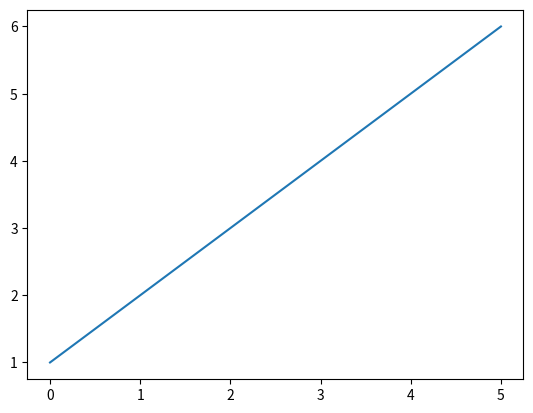

In [197]:
#line plot 
import matplotlib as mpl
import matplotlib.pyplot as plt

# 도화지 준비
plt.figure()

#그리기
plt.plot([1,2,3,4,5,6])

#화면출력
plt.show()

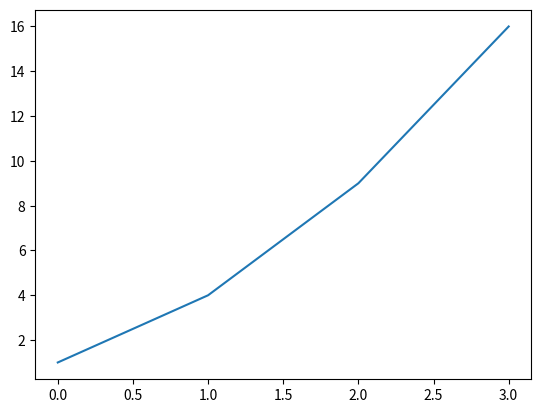

In [198]:
data = [1,4,9,16]
plt.plot([1,4,9,16])

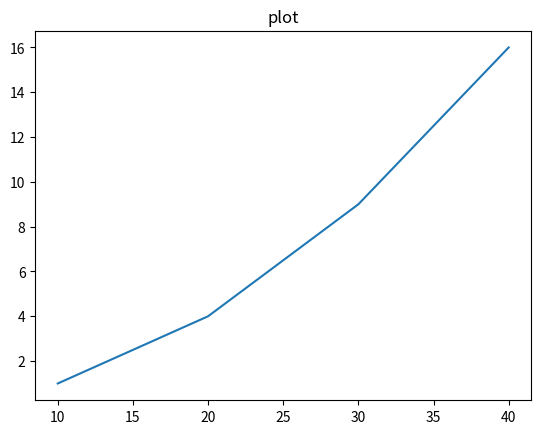

In [199]:
plt.figure(4.4)
plt.title('plot')
plt.plot([10,20,30,40],[1,4,9,16])
plt.show()
#(figsize=4.4)

In [200]:
# from matplotlib import rcParams 
# import matplotlib.font_manager as fm

# fpaths = fm.findSystemFonts()
# font_names = []

# for i in fpaths:
#     f = fm.get_font(i)
#     font_names.append(f.family_name)
    
# print(font_names[:5])

# for fn in font_names:
#     if 'malgun' in fn.lower():
#         print(fn)

In [201]:
# #설정 가능한 한글 폰트 목록 확인
from matplotlib import rcParams 
import matplotlib.font_manager as fm

fpaths = fm.findSystemFonts()
font_names = []

for path in fpaths:
    try:
        font = fm.FontProperties(fname=path)
        font_name = font.get_name()
        font_names.append(font_name)
    except RuntimeError:
        # 폰트 파일이 손상되었거나 읽을 수 없는 경우를 처리
        continue

print(font_names[:5])

for fn in font_names:
    if 'malgun' in fn.lower():
        print(fn)

['PF?????', 'Mishafi Gold', 'Noto Sans CJK KR', 'Noto Sans Modi', 'STIXSizeFourSym']


In [202]:
# from matplotlib import rcParams  
# rcParams['font.family'] = 'Malgun Gothic' #한글 글꼴 설정 
# rcParams['axes.unicode_minus'] = False

In [203]:
# plt.figure(figsize=(4,4))
# plt.title('plot')
# plt.plot([10,20,30,40],[1,4,9,16])
# plt.show()


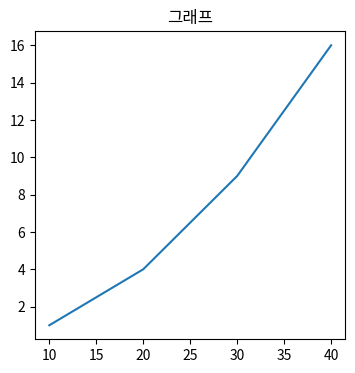

In [204]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Noto Sans CJK KR 폰트 설정
rcParams['font.family'] = 'Noto Sans CJK KR'
rcParams['axes.unicode_minus'] = False

# 그래프 그리기
plt.figure(figsize=(4, 4))
plt.title('그래프')
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.show()

In [205]:
#라인 플롯
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
t = np.arange(0, 12, 0.01)
y = np.sin(t)



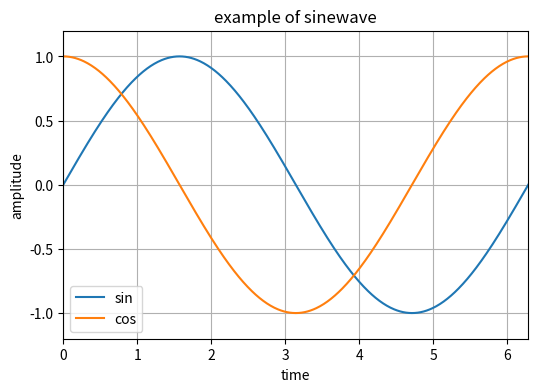

In [206]:
plt.figure(figsize=(6,4))
plt.plot(t,np.sin(t),label='sin')
plt.plot(t,np.cos(t),label='cos')

plt.title('example of sinewave')
plt.legend()
plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid()
plt.xlim(0,2* np.pi) #x축 범위
plt.ylim(-1.2,1.2)
plt.show()



In [207]:
#모양 설정
#임의의 데이터 생성
t = np.arange(0,5,0.5)
print(t)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]


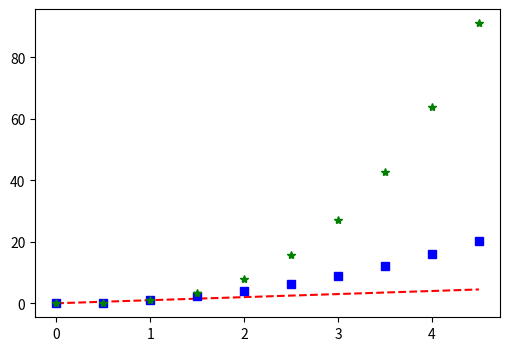

In [208]:
plt.figure(figsize=(6,4))
plt.plot(t,t,'r--')
plt.plot(t,t**2,'bs')
plt.plot(t,t**3,'g*')
plt.show()


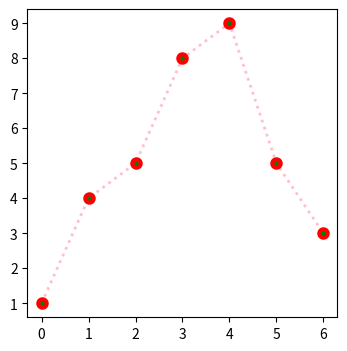

In [209]:
t = [0,1,2,3,4,5,6]
y = [1,4,5,8,9,5,3]

plt.figure(figsize=(4,4))
plt.plot(t,y,color='pink',linewidth=2,linestyle='dotted',marker='o',markerfacecolor='g',markeredgecolor='r',markeredgewidth=3)

plt.show()

#112번


---
산점도


In [210]:
#산점도 데이터 분포 확인, 데이터의 상관관계 확인 사용
t = np.array([0,1,2,3,4,5,6,7,8,9]) #array  생성
t = np.arange(0,10)
y = np.array([9,8,7,9,8,3,2,4,3,4])



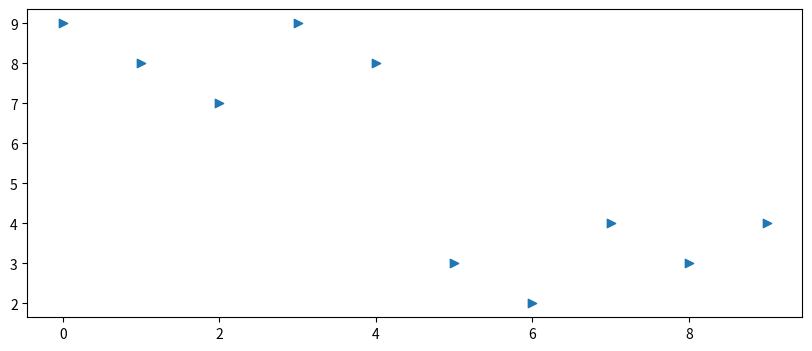

In [211]:
plt.figure(figsize=(10,4))
plt.scatter(t,y, marker='>')
plt.show()

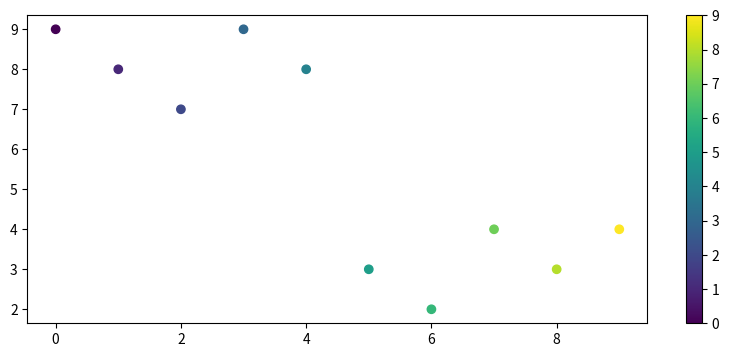

In [212]:
colormap = t # np.array([0,1,2,3,4,5,6,7,8,9])
plt.figure(figsize=(10,4))
plt.scatter(t,y, marker='o' ,c=colormap)
plt.colorbar()
plt.show()

In [213]:
#cctv와 인구현황 그래프로 분석
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Noto Sans CJK KR 폰트 설정
rcParams['font.family'] = 'Noto Sans CJK KR'
rcParams['axes.unicode_minus'] = False

data_result.head()




,소계,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,
강남구,2780,1292,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,379,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,369,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,388,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,846,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


<Axes: ylabel='구별'>

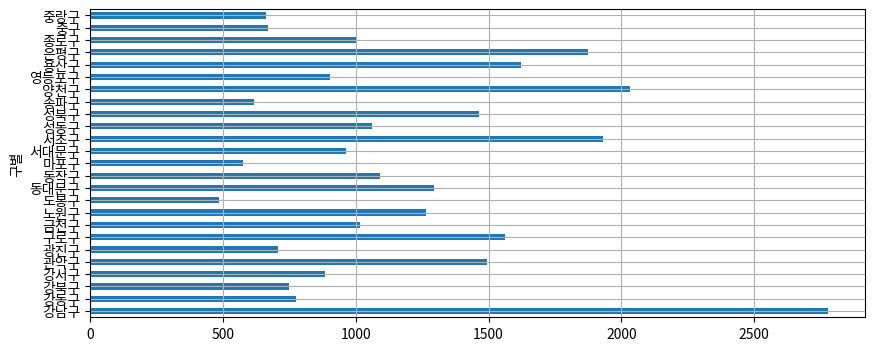

In [215]:
data_result['소계'].plot(
     kind='barh'
    ,grid=True
    ,figsize=(10,4)
)

<Axes: ylabel='구별'>

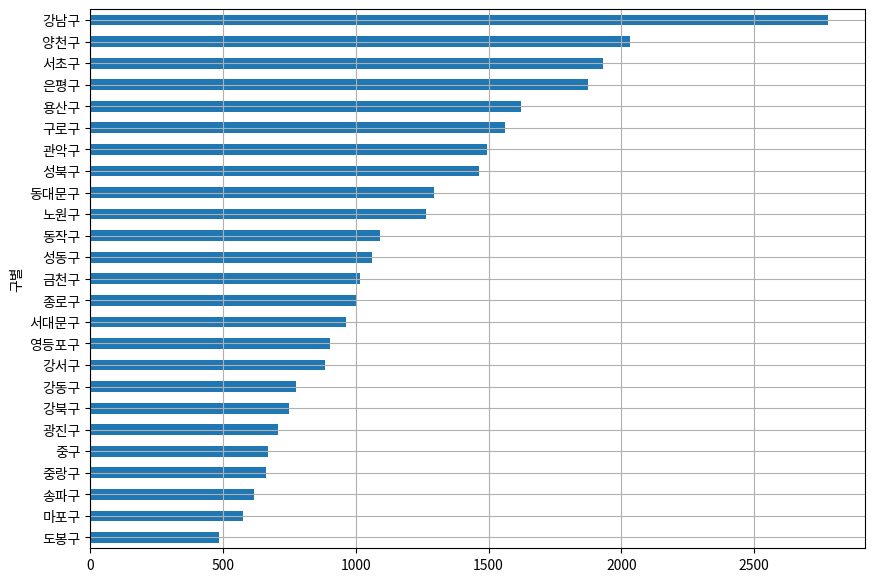

In [217]:
data_result['소계'].sort_values().plot(
    kind='barh'
    ,grid=True
    ,figsize=(10,7)
)

In [218]:
#인구수 대비 cctv 비율 -> 컬럼
data_result['CCTV비율'] = data_result['소계']/data_result['인구수']
data_result.head()


,소계,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,,
강남구,2780,1292,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.004873
강동구,773,379,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.001706
강북구,748,369,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.002265
강서구,884,388,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.001464
관악구,1496,846,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.002847


<Axes: ylabel='구별'>

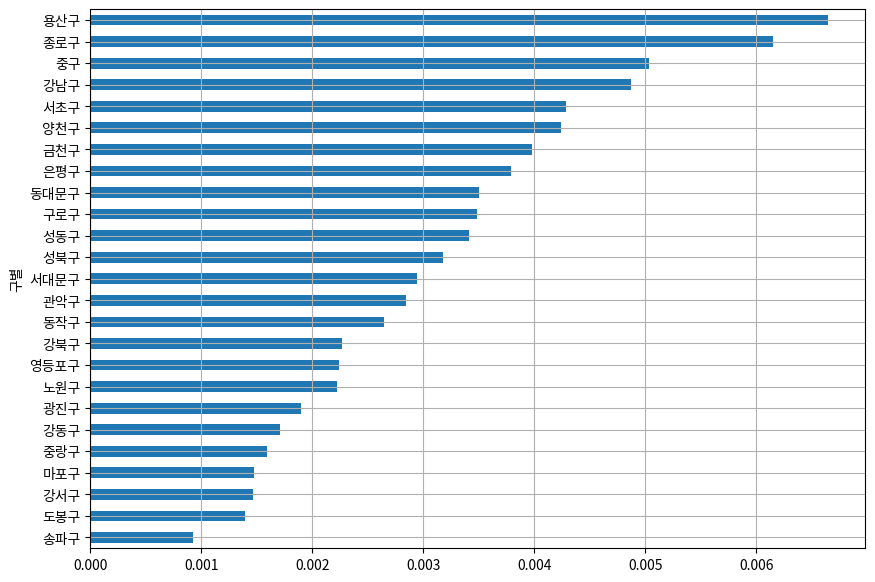

In [220]:

data_result['CCTV비율'].sort_values().plot(
    kind='barh'
    ,grid=True
    ,figsize=(10,7)
)

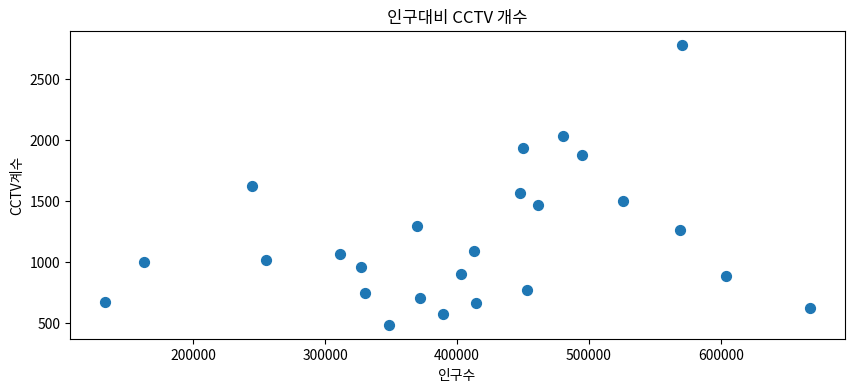

In [222]:
#산점도: 관계를 나타낸다, 인구수, 소계(cctv)
plt.figure(figsize=(10,4))
plt.scatter(
     data_result['인구수']
    ,data_result['소계']
    ,s = 50
)
plt.title('인구대비 CCTV 개수')
plt.xlabel('인구수')
plt.ylabel('CCTV계수')
plt.show()

- 데이터를 대표하는 직선 표시 (인구수와 cctv의 상관관계)
- polyfit: 지정한 특정 차수의 다항의 계수 계산 함수
y = a * x + b => 계수 : a, b
- polyid: 계수를 사용한 실제 다항식 생성(함수)
a : 2,b:3-> f(x) y=2*x+3

In [223]:
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1) #1차 함수의 계수
fp1


array([1.30916415e-03, 6.45066497e+02])

In [227]:
func = np.poly1d(fp1)
func

poly1d([1.30916415e-03, 6.45066497e+02])

In [231]:
# 위 함수에 적용할 데어터 생성 (인구수)
fx = np.linspace(100000, 1000000, 100)

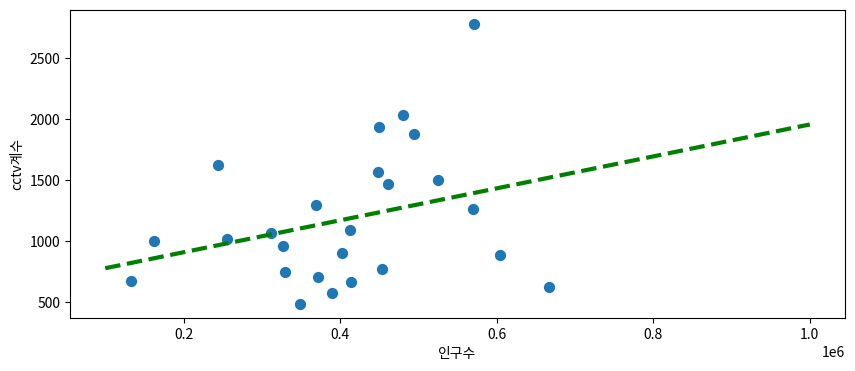

In [232]:
# 산점도와 회귀선 플롯
plt.figure(figsize=(10, 4))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, func(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('cctv계수')
plt.show()

In [234]:
#오차 구하기 : 너무 많거나 적거나 한 구를 찾기
data_result['오차'] = np.abs(data_result['소계']- func(data_result['인구수']))
data_result.head()

,소계,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,,
강남구,2780,1292,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.004873,1388.055355
강동구,773,379,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.001706,465.422892
강북구,748,369,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.002265,329.342026
강서구,884,388,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.001464,551.503155
관악구,1496,846,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.002847,162.948104


In [235]:
#오차 정렬
df_sort = data_result.sort_values(by='오차',ascending=False)
df_sort.head()

,소계,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,,
강남구,2780,1292,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.004873,1388.055355
송파구,618,529,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.000926,900.911312
양천구,2034,1843,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.004238,760.563512
서초구,1930,1406,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.004286,695.403794
용산구,1624,1368,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.006650,659.231690


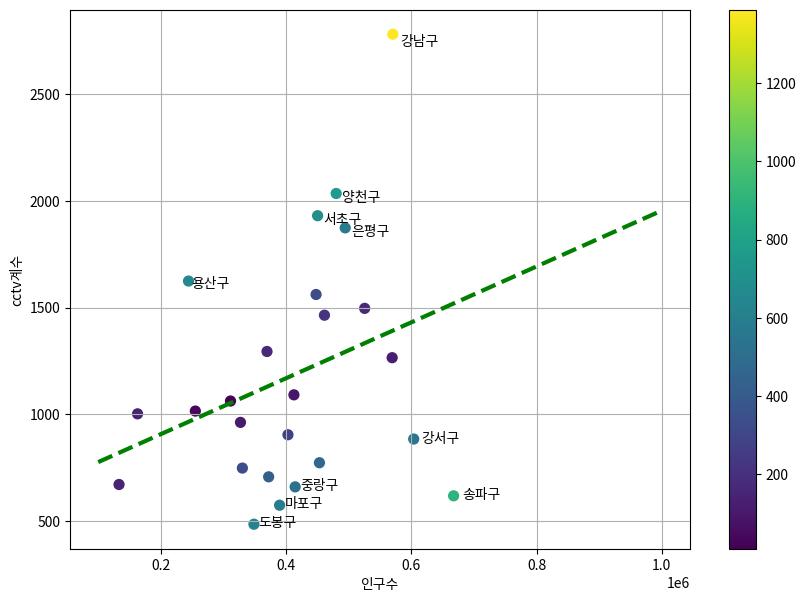

In [248]:
#오차가 심한 10개 구를 특정한 형태 출력, 나머지 구는 일반적인 형태 표시
plt.figure(figsize=(10, 7))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'],s=50)
plt.colorbar()
plt.plot(fx, func(fx), ls='dashed', lw=3, color='g')
for n in range(10):
    plt.text( #텍스트 차트에 표시 함수
        df_sort['인구수'].iloc[n] *1.02 #x축의 텍스트 표시 
        ,df_sort['소계'].iloc[n] *0.98#y축의 텍스트가 표시된 좌표 
        ,df_sort.index[n]
        ,fontsize=10
    )
plt.grid()
plt.xlabel('인구수')
plt.ylabel('cctv계수')
plt.show()